<h1>DBSCAN</h1>


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.cluster import DBSCAN

<h6>Extracting the Latitude and Longitude features</h6>

In [17]:
fields = ['X','Y']
df = pd.read_csv('test.csv', usecols = fields)
numpyMatrix = df.as_matrix()
print (numpyMatrix)
print(numpyMatrix.shape)

[[-122.3995877    37.73505101]
 [-122.39152289   37.73243239]
 [-122.42600195   37.79221244]
 ..., 
 [-122.44541822   37.7120748 ]
 [-122.38739412   37.73947927]
 [-122.48971397   37.73394977]]
(884262, 2)


<h6>Random Sampling is done on the data </h6>

In [18]:
randomsample = []
for i in range(0, len(numpyMatrix)):
	a = random.uniform(0,5)
	if(a <= 1):
		randomsample.append(numpyMatrix[i])

randomsample = np.asarray(randomsample)

numpyMatrix = randomsample
print(numpyMatrix.shape)

(176991, 2)


<h6>Scaling Features </h6>

In [19]:
for i in range(len(numpyMatrix)):
	x = numpyMatrix[i][0]
	x *= (-1)
	x %= 122
	x *= 100
	numpyMatrix[i][0] = x

	y = numpyMatrix[i][1]
	y %= 37
	y *= 100
	numpyMatrix[i][1] = y
print (numpyMatrix)

[[ 39.95877042  73.50510104]
 [ 41.55082428  78.16542806]
 [ 40.02983186  71.71808374]
 ..., 
 [ 45.11639897  74.55640063]
 [ 42.40368875  76.27513875]
 [ 41.49334957  79.12551544]]


<h6>Setting limits of the graph</h6>

In [20]:
plt.xlim(37.5, 52.5)
plt.ylim(70, 82.5)

(70, 82.5)

<h6>Setting Labels</h6>

In [21]:
plt.xlabel('Latitude')
plt.ylabel('Longitude')

<h6>Fitting the model</h6>

In [22]:
dbscan = DBSCAN(eps = 0.07, min_samples = 3)
dbscan.fit(numpyMatrix)

print(dbscan.labels_)

[  0   1   0 ..., 231   1   1]


<h6>Plotting data and visualizing Clusters</h6>

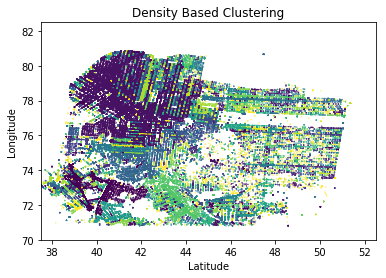

In [23]:
colors = [int(i%23) for i in dbscan.labels_]
plt.scatter(numpyMatrix[:,0], numpyMatrix[:,1], s = 0.1, c = colors)
plt.title('Density Based Clustering')
plt.figure(1)
plt.show()